In [21]:
import pandas as pd
import re


# 正規表現パターン
pattern = re.compile(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{6}')

# フォーマットが一致するかを確認
def check_format(timestamp):
    return bool(pattern.match(timestamp))

df['is_format_consistent'] = df['timestamp'].apply(check_format)

print(df)


# 日付データと timestamp データを結合
def combine_date_and_time(microseconds, date_part):
    # timedeltaを使用してマイクロ秒を時間に変換
    time_part = (datetime.min + timedelta(microseconds=microseconds)).time()
    # 日付と時間を結合して文字列に変換
    datetime_str = f"{date_part} {time_part}"
    return datetime_str

        price       timestamp   frame  quantity  kind  is_format_consistent
0      1284.0  0:28:35.904000    5475    134000     2                 False
1      1285.0  0:28:35.904001    5501      1400     1                 False
2      1286.0  0:28:35.904001    5514      2000     1                 False
3      1285.5  0:28:35.904001    5526       100     1                 False
4      1284.0  0:28:35.904001    5552      2000     2                 False
...       ...             ...     ...       ...   ...                   ...
24178  1354.0  0:28:35.925599  422974       700     1                 False
24179  1354.5  0:28:35.925599  422975       400     1                 False
24180  1355.0  0:28:35.925600  422990       500     1                 False
24181  1355.0  0:28:35.925600  423003     13300     1                 False
24182  1356.0  0:28:35.925600  423004    415300     1                 False

[24183 rows x 6 columns]


In [56]:
import json
import pandas as pd
from datetime import timedelta, datetime
import re
import pdb

# ファイルを開いて内容を読み込む
file_path = 'mnt_data/リスト1_Ticks20240517.json'

#ファイル名から日付を取得
date_str = re.search(r'(\d{8})', file_path).group(1)

# 日付データを datetime オブジェクトに変換
date_part = datetime.strptime(date_str, '%Y%m%d')

# 日付データのマイクロ秒タイムスタンプ
date_microseconds = int(date_part.timestamp() * 1_000_000)

with open(file_path, 'r') as file:
    data = json.load(file)

# mapの情報を取得
map_info = data['map']

# 特定の銘柄コードを設定
stock_code = '9509'

# 銘柄コードに対応するデータを取得
ticks_data = data['ticks'][stock_code]

# データフレームに変換
df = pd.DataFrame(ticks_data)

# map情報を使用してカラム名を設定
df.rename(columns=map_info, inplace=True)

# timestampカラムが数値（マイクロ秒）であることを確認
df['timestamp'] = df['timestamp'].astype(int)

#pdb.set_trace()
# 日付データと timestamp データを加算
df['timestamp'] = df['timestamp'] + date_microseconds
#pdb.set_trace()
# 日付文字列を datetime オブジェクトに変換
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x / 1_000_000))

# timestampをdatetime型に変換
#df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

# 'timestamp' 列をインデックスに設定
df.set_index('timestamp', inplace=True)

# データフレームの内容を確認
print(df.head())


                             price  frame  quantity  kind
timestamp                                                
2024-05-17 09:00:00.112332  1284.0   5475    134000     2
2024-05-17 09:00:00.709005  1285.0   5501      1400     1
2024-05-17 09:00:01.021446  1286.0   5514      2000     1
2024-05-17 09:00:01.093355  1285.5   5526       100     1
2024-05-17 09:00:01.364547  1284.0   5552      2000     2


In [38]:
df.columns.tolist()

['price', 'frame', 'quantity', 'kind']

In [39]:
df

,price,frame,quantity,kind
timestamp,,,,
2024-05-17 09:00:00.112332,1284.0,5475,134000,2
2024-05-17 09:00:00.709005,1285.0,5501,1400,1
2024-05-17 09:00:01.021446,1286.0,5514,2000,1
2024-05-17 09:00:01.093355,1285.5,5526,100,1
2024-05-17 09:00:01.364547,1284.0,5552,2000,2
...,...,...,...,...
2024-05-17 14:59:58.992905,1354.0,422974,700,1
2024-05-17 14:59:58.992905,1354.5,422975,400,1
2024-05-17 14:59:59.734315,1355.0,422990,500,1


In [72]:
df_resampled

,open,high,low,close
timestamp,,,,
2024-05-17 09:00:00,1284.0,1305.0,1277.0,1287.5
2024-05-17 09:05:00,1286.5,1298.5,1285.5,1292.5
2024-05-17 09:10:00,1292.0,1305.0,1289.0,1299.0
2024-05-17 09:15:00,1299.5,1302.0,1289.0,1293.5
2024-05-17 09:20:00,1293.5,1293.5,1282.5,1292.5
...,...,...,...,...
2024-05-17 14:40:00,1344.5,1347.0,1344.0,1345.0
2024-05-17 14:45:00,1345.0,1350.0,1345.0,1347.0
2024-05-17 14:50:00,1347.0,1350.5,1346.5,1350.5


In [106]:
# 任意の enter と exit の時間
enter_time = pd.to_datetime('2024-05-17 09:32:19.000000')
enter_price =1301
exit_time = pd.to_datetime('2024-05-17 09:38:20.000000')
exit_price =1288.03

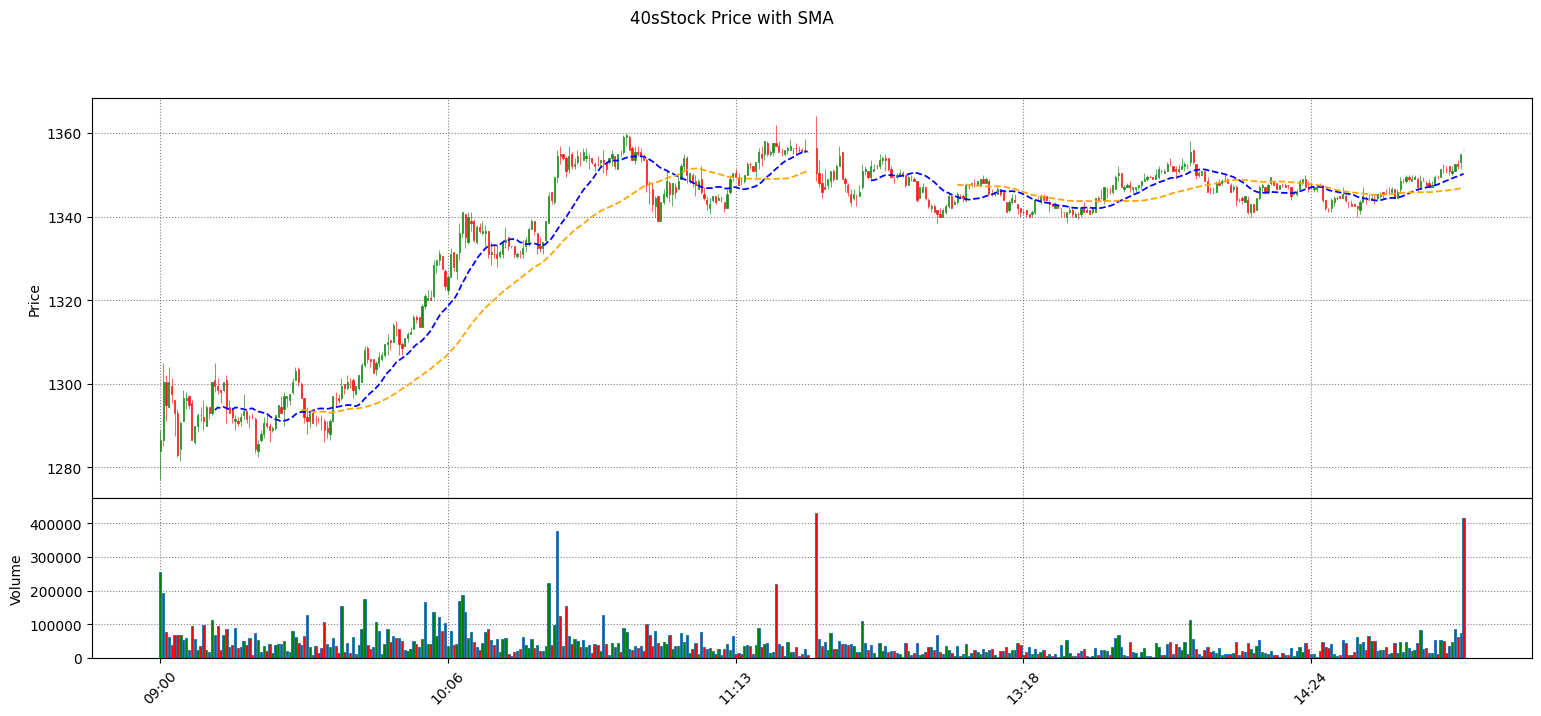

In [105]:
import mplfinance as mpf
from datetime import timedelta

# 'timestamp' 列を datetime 型に変換
#df['timestamp'] = pd.to_datetime(df['timestamp'])

# 'price' 列を float 型に変換
df['price'] = df['price'].astype(float)

interval=str(40)+'s'
#秒: 's'
#分：'min'
#時間：'H'
#日：'D'
#月：'M'
#年：'A' または 'Y'

ohlc_dict ={
    'price': 'ohlc',
    'quantity':'sum'
}

# 1分ごとにリサンプリングして OHLC データを計算
df_resampled = df.resample(interval).apply(ohlc_dict)
df_resampled.columns = [ 'Open', 'High', 'Low', 'Close', 'Volume']

#11時31分から12:29までのデータを削除
df_resampled = df_resampled[(df_resampled.index.time < pd.to_datetime('11:31').time()) | (df_resampled.index.time > pd.to_datetime('12:29').time())]


# 移動平均線を計算
df_resampled['SMA_20'] = df_resampled['Close'].rolling(window=20).mean()
df_resampled['SMA_50'] = df_resampled[ 'Close'].rolling(window=50).mean()

# カスタムスタイルの設定
mc = mpf.make_marketcolors(up='g', down='r', edge='i', wick='i', volume='in', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc, gridstyle=':', gridcolor='gray')

# 移動平均線の追加
addplot = [
    mpf.make_addplot(df_resampled['SMA_20'], color='blue', linestyle='--'),
    mpf.make_addplot(df_resampled['SMA_50'], color='orange', linestyle='--')
]

# チャートのプロット
mpf.plot(df_resampled, type='candle', style=s, figsize=(20,8), addplot=addplot, volume=True, title= interval +'Stock Price with SMA', ylabel='Price', ylabel_lower='Volume')


# ローソクチャートを描画
#mpf.plot(df_resampled, type='candle', style='charles', title=interval+'Candlestick Chart', ylabel='Price')


In [31]:
if not df.index.is_unique:
    print("重複インデックスが検出されました。")
    print(df.index[df.index.duplicated()])

重複インデックスが検出されました。
DatetimeIndex(['2024-05-17 09:00:01.364547', '2024-05-17 09:00:01.364547',
               '2024-05-17 09:00:01.364547', '2024-05-17 09:00:01.364547',
               '2024-05-17 09:00:01.364547', '2024-05-17 09:00:01.364547',
               '2024-05-17 09:00:02.023168', '2024-05-17 09:00:02.722799',
               '2024-05-17 09:00:03.010921', '2024-05-17 09:00:03.010921',
               ...
               '2024-05-17 14:59:21.393975', '2024-05-17 14:59:21.393975',
               '2024-05-17 14:59:37.733711', '2024-05-17 14:59:37.804943',
               '2024-05-17 14:59:39.801515', '2024-05-17 14:59:39.815443',
               '2024-05-17 14:59:46.645332', '2024-05-17 14:59:46.645332',
               '2024-05-17 14:59:55.931516', '2024-05-17 14:59:58.992905'],
              dtype='datetime64[ns]', name='timestamp', length=1822, freq=None)


In [54]:
df.index[df.index.duplicated()]

DatetimeIndex([], dtype='datetime64[ns]', name='timestamp', freq=None)

In [32]:
#重複インデックスの修正
    # 重複インデックスに微小な時間差を加えて一意にする
import pdb

duplicates = df.index[df.index.duplicated()].unique()

for idx in duplicates:

    indices = df.index.get_loc(idx) #特定のインデックス idx に対応する位置（行番号）を取得　
                                    # ⇒ slice(13, 15, None)のような値 start stop step Noneはデフォルトで１
    if isinstance(indices, slice):
        indices = range(indices.start, indices.stop)
    #print(f'idx: {idx}  - if isinstanceの後の indices:{indices}')
    #pdb.set_trace()
    for i in indices:
        df.index.values[i] += pd.Timedelta(microseconds=i - indices.start)

df=df.sort_index()

In [33]:
 not df.index.duplicated().any()

True

In [34]:
df

,price,frame,quantity,kind
timestamp,,,,
2024-05-17 09:00:00.112332,1284.0,5475,134000,2
2024-05-17 09:00:00.709005,1285.0,5501,1400,1
2024-05-17 09:00:01.021446,1286.0,5514,2000,1
2024-05-17 09:00:01.093355,1285.5,5526,100,1
2024-05-17 09:00:01.364547,1284.0,5552,2000,2
...,...,...,...,...
2024-05-17 14:59:58.992905,1354.0,422974,700,1
2024-05-17 14:59:58.992906,1354.5,422975,400,1
2024-05-17 14:59:59.734315,1355.0,422990,500,1


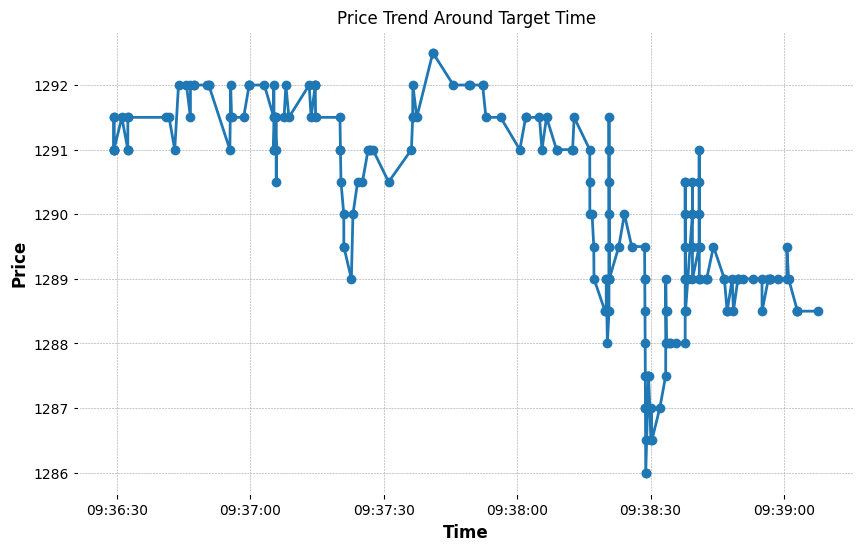

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 指定した時間
target_time = pd.to_datetime('2024-05-17 09:38:20.000000')

# 指定した時間に最も近いタイムスタンプを探す
    # 最も近いタイムスタンプを手動で探す　df.index.get_indexer([target_time], method='nearest')[0]はおそらくマイクロ秒まで見ていない
closest_index =  np.abs(df.index - target_time).argmin()

# 前後100本のデータを取得
start_index = max(0, closest_index - 100)
end_index = min(len(df), closest_index + 101)  # inclusive of closest_index

df_subset = df.iloc[start_index:end_index]

# 価格推移を描画
plt.figure(figsize=(10, 6))
plt.plot(df_subset.index, df_subset['price'], marker='o')
plt.title('Price Trend Around Target Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


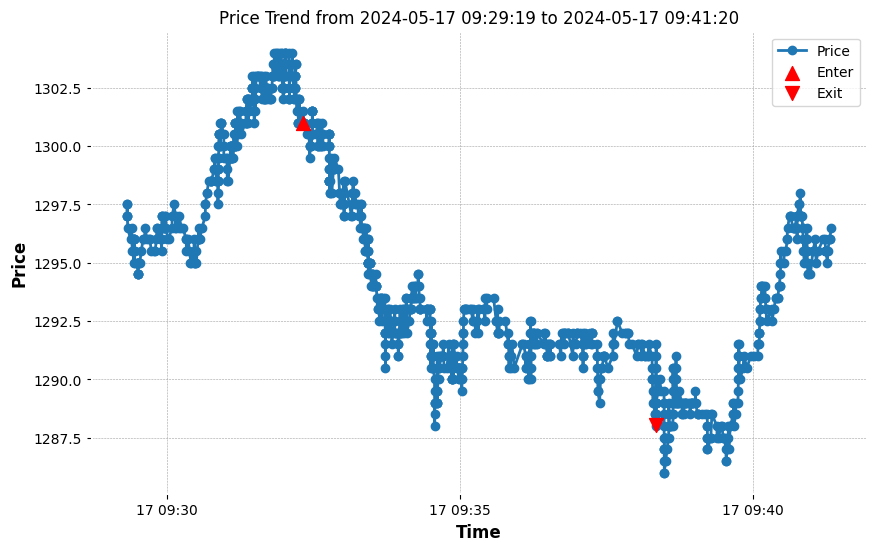

In [37]:
# 任意の enter と exit の時間
enter_time = pd.to_datetime('2024-05-17 09:32:19.000000')
enter_price =1301
exit_time = pd.to_datetime('2024-05-17 09:38:20.000000')
exit_price =1288.03
# 時間範囲の設定
start_time = enter_time - timedelta(minutes=3)
end_time = exit_time + timedelta(minutes=3)

# 時間範囲内のデータを取得
mask = (df.index >= start_time) & (df.index <= end_time)
df_subset = df.loc[mask]

# 価格推移を描画
plt.figure(figsize=(10, 6))
plt.plot(df_subset.index, df_subset['price'], marker='o', label='Price')
plt.scatter([enter_time], [enter_price], color='red', zorder=5, label='Enter', marker='^', s=100)
plt.scatter([exit_time], [exit_price], color='red', zorder=5, label='Exit', marker='v', s=100)
plt.title(f'Price Trend from {start_time} to {end_time}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

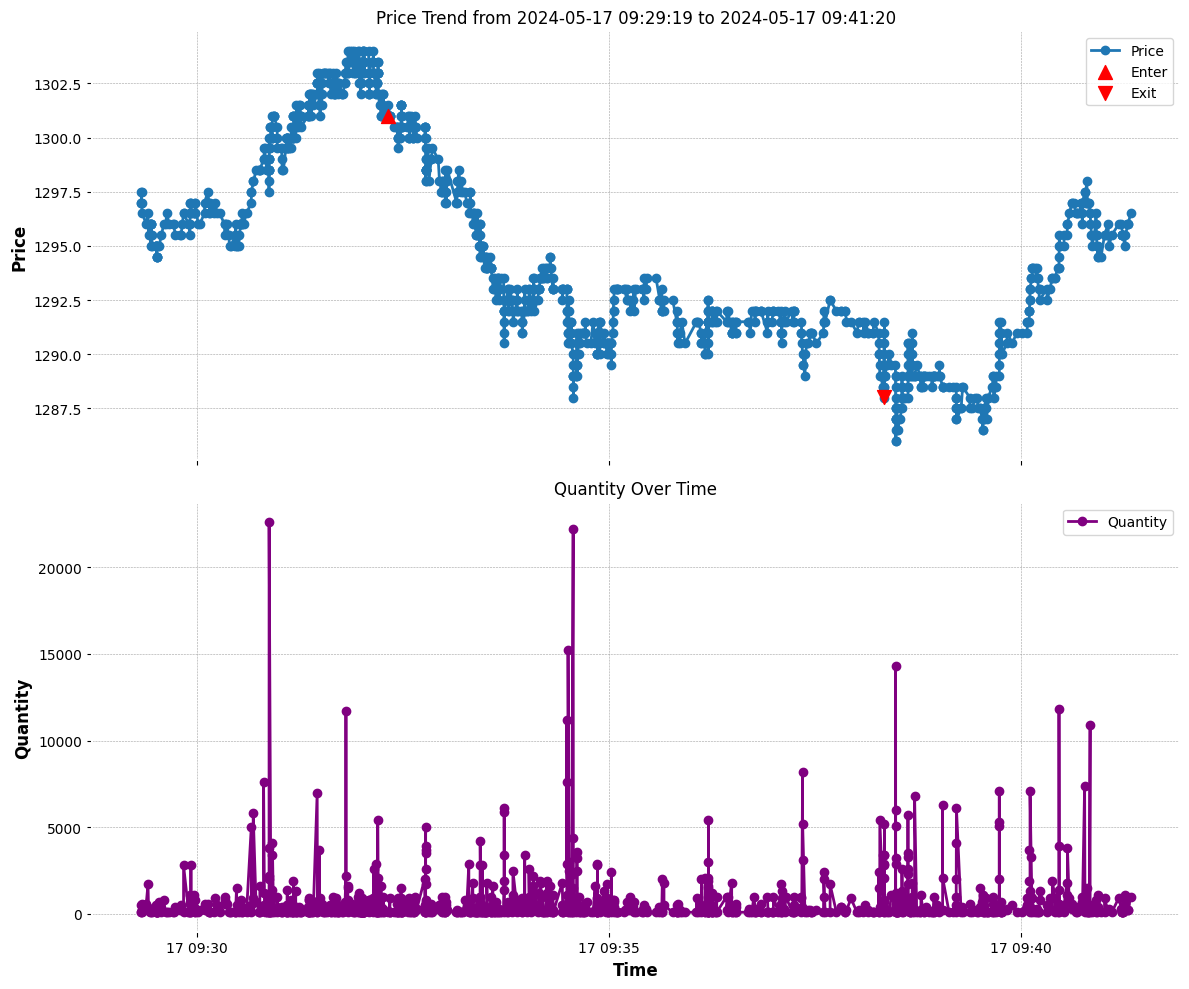

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import ipywidgets as widgets
from ipywidgets import interact

# 任意の enter と exit の時間
enter_time = pd.to_datetime('2024-05-17 09:32:19.000000')
enter_price =1301
exit_time = pd.to_datetime('2024-05-17 09:38:20.000000')
exit_price =1288.03
# 時間範囲の設定
start_time = enter_time - timedelta(minutes=3)
end_time = exit_time + timedelta(minutes=3)

# 時間範囲内のデータを取得
mask = (df.index >= start_time) & (df.index <= end_time)
df_subset = df.loc[mask]

# サブプロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 価格推移を描画
ax1.plot(df_subset.index, df_subset['price'], marker='o', label='Price')
ax1.scatter([enter_time], [enter_price], color='red', zorder=5, label='Enter', marker='^', s=100)
ax1.scatter([exit_time], [exit_price], color='red', zorder=5, label='Exit', marker='v', s=100)
ax1.set_title(f'Price Trend from {start_time} to {end_time}')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# quantity の合計を時間あたりに対応して描画
ax2.plot(df_subset.index, df_subset['quantity'], marker='o', color='purple', label='Quantity')
ax2.set_title('Quantity Over Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Quantity')
ax2.legend()
ax2.grid(True)

# グラフの表示
plt.tight_layout()
plt.show()

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import ipywidgets as widgets
from ipywidgets import interact

# 任意の enter と exit の時間
enter_time = pd.to_datetime('2024-05-17 09:32:19.000000')
enter_price =1301
exit_time = pd.to_datetime('2024-05-17 09:38:20.000000')
exit_price =1288.03
# 時間範囲の設定
start_time = enter_time - timedelta(minutes=3)
end_time = exit_time + timedelta(minutes=3)

# 時間範囲の設定関数
def plot_price_quantity(start_minute, end_minute):
    start_time = enter_time - timedelta(minutes=start_minute)
    end_time = exit_time + timedelta(minutes=end_minute)

    # 時間範囲内のデータを取得
    mask = (df.index >= start_time) & (df.index <= end_time)
    df_subset = df.loc[mask]

    # サブプロットの作成
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # 価格推移を描画
    ax1.plot(df_subset.index, df_subset['price'], marker='o', label='Price')
    ax1.scatter([enter_time], [enter_price], color='red', zorder=5, label='Enter', marker='^', s=100)
    ax1.scatter([exit_time], [exit_price], color='red', zorder=5, label='Exit', marker='v', s=100)
    ax1.set_title(f'Price Trend from {start_time} to {end_time}')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # quantity の合計を時間あたりに対応して描画
    ax2.plot(df_subset.index, df_subset['quantity'], marker='o', color='purple', label='Quantity')
    ax2.set_title('Quantity Over Time')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Quantity')
    ax2.legend()
    ax2.grid(True)

    # グラフの表示
    plt.tight_layout()
    plt.show()

# インタラクティブウィジェットの作成
interact(plot_price_quantity, start_minute=widgets.IntSlider(min=0, max=30, step=1, value=3),
         end_minute=widgets.IntSlider(min=0, max=30, step=1, value=3));
    #スライドバーをマイナスにすることはできるが情報量は増えない（図は大きくなることはなく、情報が欠落していく）

interactive(children=(IntSlider(value=3, description='start_minute', max=30), IntSlider(value=3, description='…

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import ipywidgets as widgets
from ipywidgets import interact

def plot_price_quantity(display_start_delta, display_end_delta):
    display_start_time = enter_time + timedelta(minutes=display_start_delta)
    display_end_time = exit_time + timedelta(minutes=display_end_delta)

    # 時間範囲内のデータを取得
    mask = (df.index >= display_start_time) & (df.index <= display_end_time)
    df_subset = df.loc[mask]

    # データがあるか確認
    if df_subset.empty:
        print("指定した範囲にデータがありません。")
        return

    # サブプロットの作成
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # 価格推移を描画
    ax1.plot(df_subset.index, df_subset['price'], marker='o', label='Price')
    ax1.scatter([enter_time], [enter_price], color='red', zorder=5, label='Enter', marker='^', s=100)
    ax1.scatter([exit_time], [exit_price], color='red', zorder=5, label='Exit', marker='v', s=100)
    ax1.set_title(f'Price Trend from {display_start_time} to {display_end_time}')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # quantity の合計を時間あたりに対応して描画
    ax2.plot(df_subset.index, df_subset['quantity'], marker='o', color='purple', label='Quantity')
    ax2.set_title('Quantity Over Time')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Quantity')
    ax2.legend()
    ax2.grid(True)

    # グラフの表示
    plt.tight_layout()
    plt.show()
    
# 任意の enter と exit の時間
enter_time = pd.to_datetime('2024-05-17 09:32:19.000000')
enter_price =1301
exit_time = pd.to_datetime('2024-05-17 09:38:20.000000')
exit_price =1288.03

# インタラクティブウィジェットの作成
interact(
    plot_price_quantity,
    display_start_delta=widgets.IntSlider(min=-10, max=10, step=1, value=-3),
    display_end_delta=widgets.IntSlider(min=-10, max=10, step=1, value=3)
);

interactive(children=(IntSlider(value=-3, description='display_start_delta', max=10, min=-10), IntSlider(value…